In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import u

# Data Generation

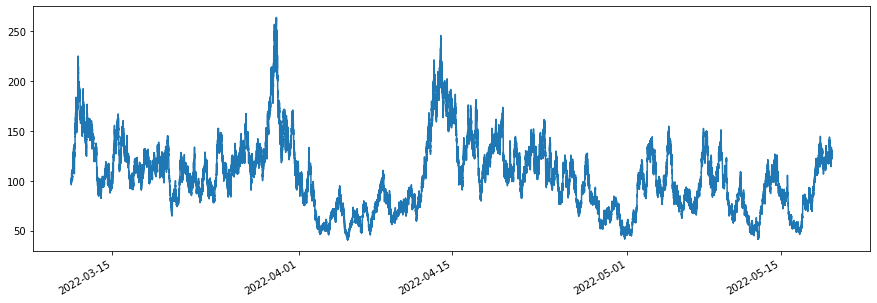

<AxesSubplot:>

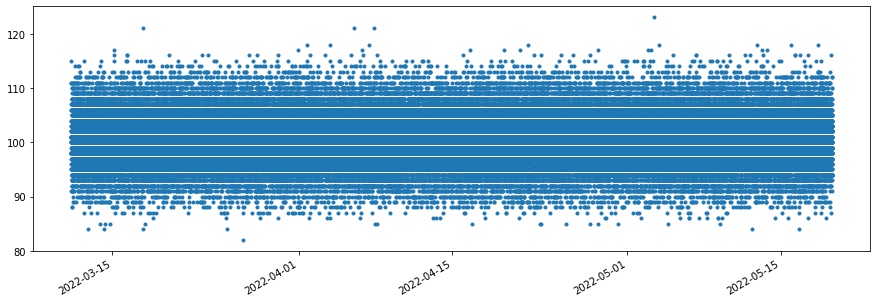

In [3]:
plt.rcParams["figure.figsize"] = (15, 5)

data = u.create_price_data(theta=0.0005, start_price=100, n_samples=100000)
data = u.add_volume_data(data, var=20)

data["close"].plot.line()
plt.show()
data["volume"].plot(style=".")

In [4]:
def create_bar_indices(data: pd.DataFrame, thres: float, name: str):
    indices = np.full(len(data.index), False, dtype=bool)
    csum = 0.0
    for e, (_, r) in enumerate(data.iterrows()):
        if csum >= thres:
            csum = 0.0
            indices[e] = True
        csum += r[name]
    return indices


def group_bars(data, indices):
    groups = data.reset_index().groupby(indices.cumsum())
    bars = groups[["volume"]].sum()
    return groups, bars


def get_bars(group):
    groups, bars = group
    bars.set_index(groups["index"].first(), inplace=True)
    return bars


def with_dv(group):
    groups, bars = group
    bars["dv"] = groups["dv"].sum()
    return groups, bars


def with_open(group):
    groups, bars = group
    bars["open"] = groups["close"].first()
    return groups, bars


def with_low(group):
    groups, bars = group
    bars["low"] = groups["close"].min()
    return groups, bars


def with_high(group):
    groups, bars = group
    bars["high"] = groups["close"].max()
    return groups, bars


def with_close(group):
    groups, bars = group
    bars["close"] = groups["close"].last()
    return groups, bars

# Tick Bars

In [5]:
data["tmp"] = 1
tick_indices = create_bar_indices(data, 60, "tmp")
g = group_bars(data, tick_indices)
g = with_open(g)
g = with_close(g)
g = with_high(g)
g = with_low(g)
tick_bars = get_bars(g)
tick_bars.head()

,volume,open,close,high,low
index,,,,,
2022-03-11 06:13:39.558579,6072.0,100.00,105.74,108.14,96.02
2022-03-11 07:13:39.558579,5989.0,105.77,106.09,110.76,101.12
2022-03-11 08:13:39.558579,6016.0,104.79,110.94,110.94,100.27
2022-03-11 09:13:39.558579,6061.0,110.49,128.89,128.89,108.15
2022-03-11 10:13:39.558579,6067.0,128.89,127.89,128.89,113.26


c:\users\maxga\appdata\local\programs\python\python38\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


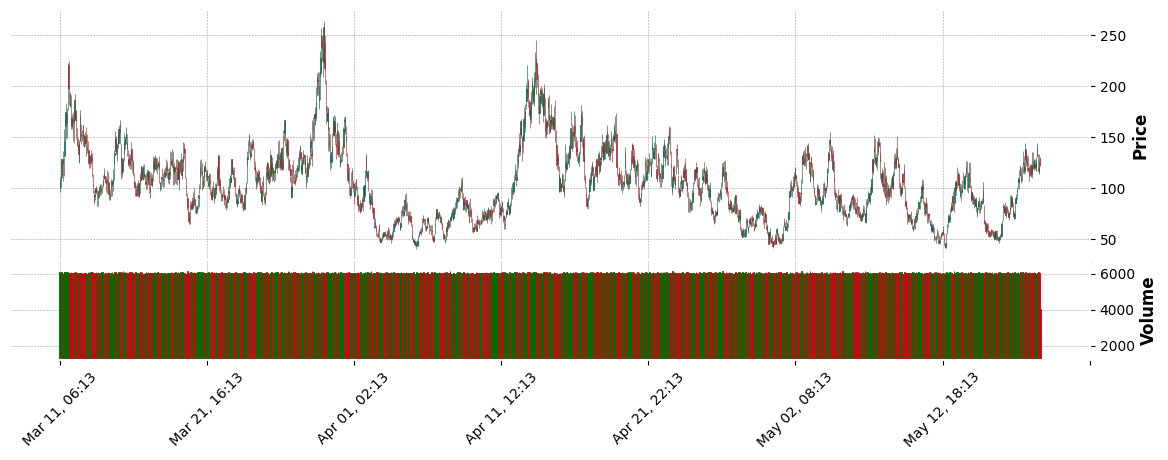

In [17]:
mplf.plot(tick_bars, type="candle", style="charles", figsize=(15, 5), volume=True)

# Dollar Bars

In [7]:
data["dv"] = data["close"] * data["volume"]

In [8]:
mean_hourly_dv = np.mean(data.resample("H")["dv"].sum())
mean_hourly_dv

627081.303545291

In [9]:
dv_indices = create_bar_indices(data, mean_hourly_dv, "dv")
g = group_bars(data, dv_indices)
g = with_dv(g)
g = with_open(g)
g = with_close(g)
g = with_high(g)
g = with_low(g)
dv_bars = get_bars(g)
dv_bars.head()

,volume,dv,open,close,high,low
index,,,,,,
2022-03-11 06:13:39.558579,6262.0,636857.37,100.00,107.19,108.14,96.02
2022-03-11 07:15:39.558579,6005.0,635520.85,106.48,103.71,110.76,101.12
2022-03-11 08:15:39.558579,6107.0,635686.48,102.85,109.48,111.60,100.27
2022-03-11 09:16:39.558579,5467.0,634767.60,108.88,126.70,126.70,108.15
2022-03-11 10:10:39.558579,5262.0,633440.95,128.66,119.04,128.89,113.26


c:\users\maxga\appdata\local\programs\python\python38\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


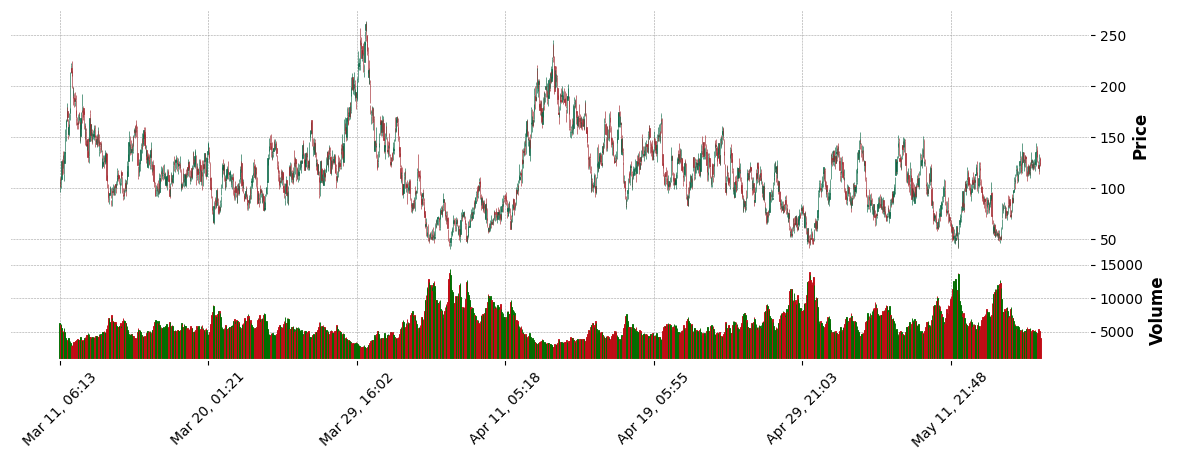

In [10]:
mplf.plot(dv_bars, type="candle", style="charles", figsize=(15, 5), volume=True)

# Volume Bars

In [11]:
mean_hourly_volume = np.mean(data.resample("H")["volume"].sum())
mean_hourly_volume

6031.040791841631

In [12]:
volume_indices = create_bar_indices(data, mean_hourly_volume, "volume")
g = group_bars(data, volume_indices)
g = with_dv(g)
g = with_open(g)
g = with_close(g)
g = with_high(g)
g = with_low(g)
v_bars = get_bars(g)
v_bars.head()

,volume,dv,open,close,high,low
index,,,,,,
2022-03-11 06:13:39.558579,6072.0,616624.75,100.00,105.74,108.14,96.02
2022-03-11 07:13:39.558579,6091.0,644967.63,105.77,104.79,110.76,101.12
2022-03-11 08:14:39.558579,6113.0,635743.28,103.71,111.60,111.60,100.27
2022-03-11 09:15:39.558579,6065.0,709741.03,109.48,127.74,128.89,108.15
2022-03-11 10:15:39.558579,6060.0,729679.68,128.23,130.18,130.18,113.26


c:\users\maxga\appdata\local\programs\python\python38\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


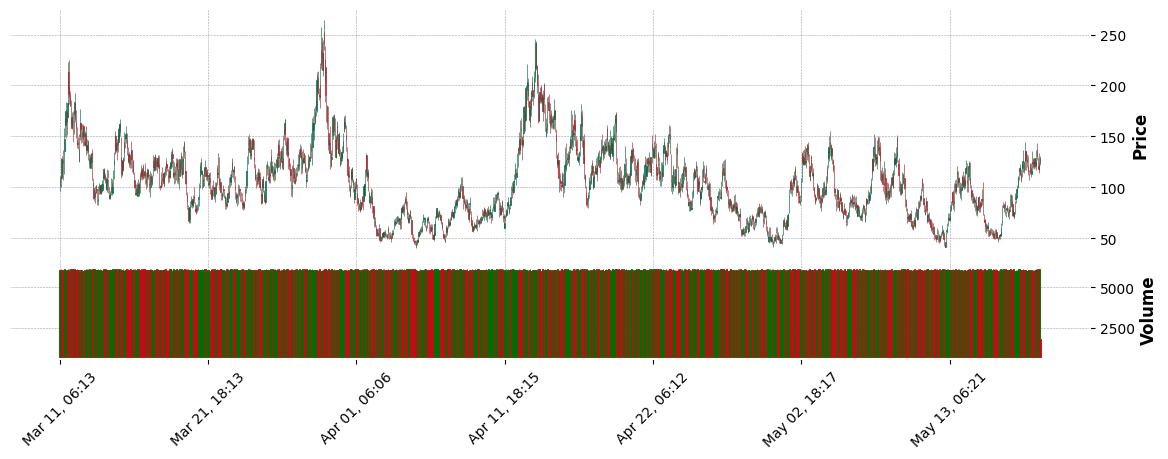

In [13]:
mplf.plot(v_bars, type="candle", style="charles", figsize=(15, 5), volume=True)

# Weekly Counts

<AxesSubplot:xlabel='index'>

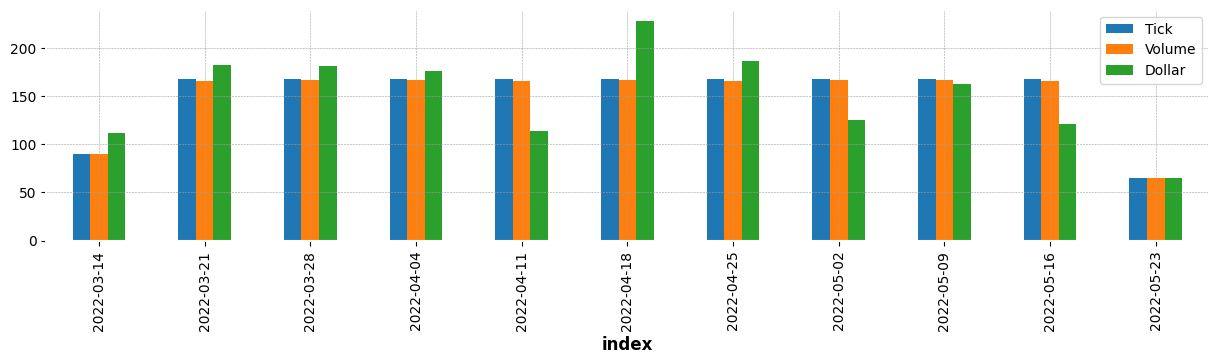

In [14]:
tick_bar_counts = tick_bars.resample("W-MON")["close"].count()
v_bar_counts = v_bars.resample("W-MON")["close"].count()
dv_bar_counts = dv_bars.resample("W-MON")["close"].count()

count_df = pd.concat([tick_bar_counts, v_bar_counts, dv_bar_counts], axis=1)
count_df.columns = ['Tick', 'Volume', 'Dollar']
count_df.index = count_df.index.strftime('%Y-%m-%d')

count_df.plot(kind = 'bar', figsize=[15, 3])

# Autocorrelations

In [15]:
def add_returns(data):
    data["return"] = data["close"].divide(data["close"].shift(1)) - 1
    return data


tick_autocorr = add_returns(tick_bars)["return"].autocorr()
v_autocorr = add_returns(v_bars)["return"].autocorr()
dv_autocorr = add_returns(dv_bars)["return"].autocorr()

pd.DataFrame({"Bar Type": ["Tick", "Volume", "Dollar Volume"], "Auto Correlation": [tick_autocorr, v_autocorr, dv_autocorr]})

,Bar Type,Auto Correlation
0,Tick,-0.029491
1,Volume,-0.008513
2,Dollar Volume,-0.028220
